<a href="https://colab.research.google.com/github/saeedabi1/Deep_Learning_CMPE_258/blob/master/assignment_1_a_What's_your_image_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [4]:
help(URLs)

Help on class URLs in module fastai.datasets:

class URLs(builtins.object)
 |  Global constants for dataset and model URLs.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  ADULT_SAMPLE = 'http://files.fast.ai/data/examples/adult_sample'
 |  
 |  AG_NEWS = 'https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv'
 |  
 |  AMAZON_REVIEWS = 'https://s3.amazonaws.com/fast-ai-nlp/amazon_review_f...
 |  
 |  AMAZON_REVIEWS_POLARITY = 'https://s3.amazonaws.com/fast-ai-nlp/amazon...
 |  
 |  BIWI_HEAD_POSE = 'https://s3.amazonaws.com/fast-ai-imagelocal/biwi_hea...
 |  
 |  BIWI_SAMPLE = 'http://files.fast.ai/data/examples/biwi_sample'
 |  
 |  CALTECH_101 = 'https://s3.amazonaws.com/fast-ai-imageclas/caltech_101'
 |  
 |  CAMVI

# **The CIFAR or CIFAR-10 dataset**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


In [5]:
path = untar_data(URLs.CIFAR); path

PosixPath('/root/.fastai/data/cifar10')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/test')]

**Getting the data**

In [0]:
path_test = path/'test'
path_train = path/'train'

In [8]:
path_test.ls()

[PosixPath('/root/.fastai/data/cifar10/test/horse'),
 PosixPath('/root/.fastai/data/cifar10/test/ship'),
 PosixPath('/root/.fastai/data/cifar10/test/airplane'),
 PosixPath('/root/.fastai/data/cifar10/test/bird'),
 PosixPath('/root/.fastai/data/cifar10/test/automobile'),
 PosixPath('/root/.fastai/data/cifar10/test/cat'),
 PosixPath('/root/.fastai/data/cifar10/test/truck'),
 PosixPath('/root/.fastai/data/cifar10/test/deer'),
 PosixPath('/root/.fastai/data/cifar10/test/frog'),
 PosixPath('/root/.fastai/data/cifar10/test/dog')]

In [9]:
path_train.ls()


[PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/cat'),
 PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/dog')]

In [0]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0).normalize(imagenet_stats)

Showing the images batch:

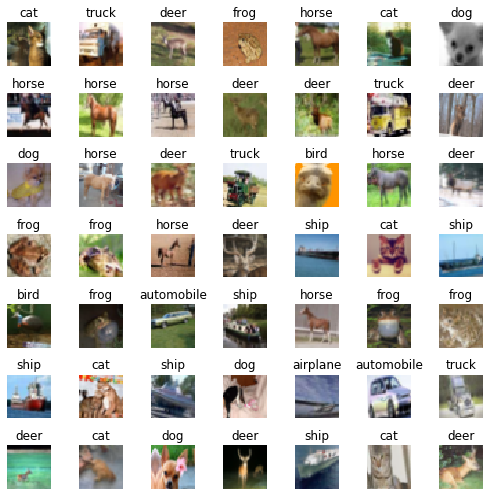

In [11]:
data.show_batch(rows=7, figsize=(7,7))


In [12]:
#Here are the classes in the dataset:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

# **Training: resnet34**

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. we are building a model which will take images as input and will output the predicted probability for each of the categories 

We will train for 4 epochs (4 cycles through all our data).

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.672578,1.472307,0.521300,02:00
1,1.309381,1.148583,0.406600,02:02
2,1.179175,1.018878,0.358700,02:01
3,1.107398,0.992075,0.348300,02:01


In [0]:
learn.save('stage-1')


# **Results:**
Let's see what results we have got:

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

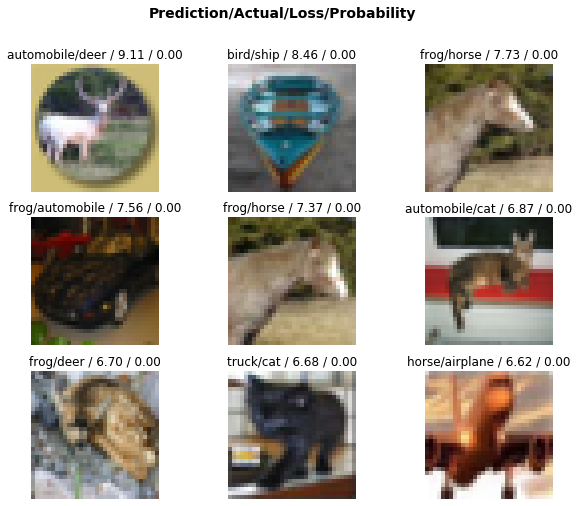

In [18]:
interp.plot_top_losses(9, figsize=(10,8))


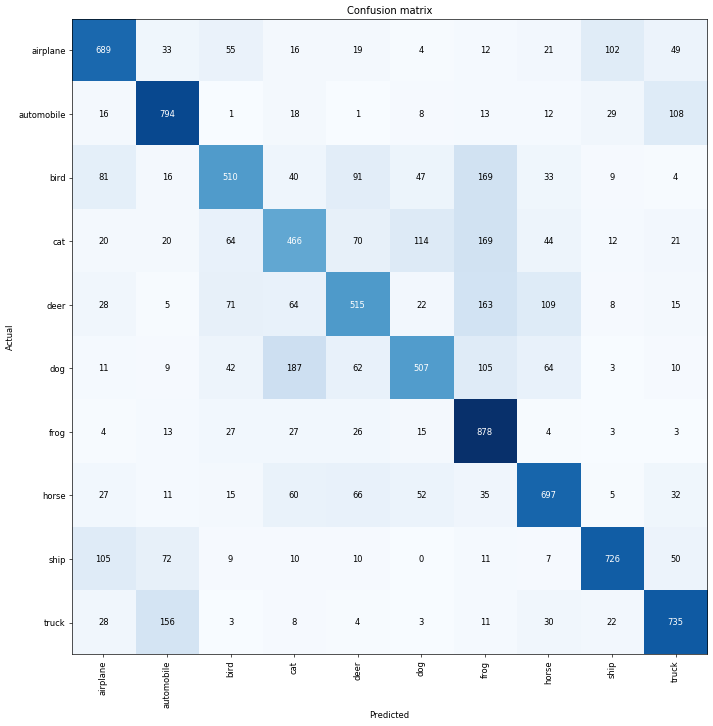

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [20]:
interp.most_confused(min_val=2)


[('dog', 'cat', 187),
 ('bird', 'frog', 169),
 ('cat', 'frog', 169),
 ('deer', 'frog', 163),
 ('truck', 'automobile', 156),
 ('cat', 'dog', 114),
 ('deer', 'horse', 109),
 ('automobile', 'truck', 108),
 ('dog', 'frog', 105),
 ('ship', 'airplane', 105),
 ('airplane', 'ship', 102),
 ('bird', 'deer', 91),
 ('bird', 'airplane', 81),
 ('ship', 'automobile', 72),
 ('deer', 'bird', 71),
 ('cat', 'deer', 70),
 ('horse', 'deer', 66),
 ('cat', 'bird', 64),
 ('deer', 'cat', 64),
 ('dog', 'horse', 64),
 ('dog', 'deer', 62),
 ('horse', 'cat', 60),
 ('airplane', 'bird', 55),
 ('horse', 'dog', 52),
 ('ship', 'truck', 50),
 ('airplane', 'truck', 49),
 ('bird', 'dog', 47),
 ('cat', 'horse', 44),
 ('dog', 'bird', 42),
 ('bird', 'cat', 40),
 ('horse', 'frog', 35),
 ('airplane', 'automobile', 33),
 ('bird', 'horse', 33),
 ('horse', 'truck', 32),
 ('truck', 'horse', 30),
 ('automobile', 'ship', 29),
 ('deer', 'airplane', 28),
 ('truck', 'airplane', 28),
 ('frog', 'bird', 27),
 ('frog', 'cat', 27),
 ('horse

# **Unfreezing, fine-tuning, and learning rates**
Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [0]:
learn.unfreeze()


In [22]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.700339,0.576653,0.197800,02:14


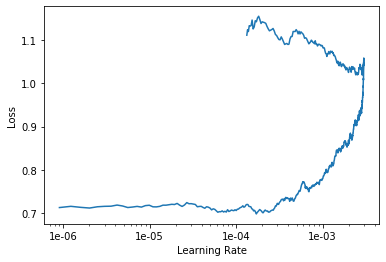

In [23]:
learn.recorder.plot()


In [24]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.611066,0.562848,0.191900,02:11
1,0.613612,0.560977,0.191900,02:08


# **Training: resnet50**
instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers.

In [0]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0).normalize(imagenet_stats)

In [26]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [27]:
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


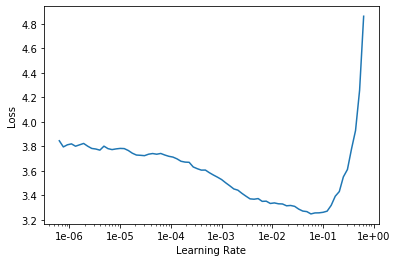

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(8)


epoch,train_loss,valid_loss,error_rate,time
0,1.818445,1.509999,0.513200,02:13
1,1.391014,1.232665,0.432600,02:13
2,1.141546,0.982682,0.342000,02:11
3,0.956152,0.847800,0.292300,02:10
4,0.860991,0.767981,0.269900,02:13
5,0.826874,0.722412,0.253900,02:09
6,0.785573,0.701412,0.245600,02:10
7,0.795877,0.691478,0.245400,02:13


In [0]:
learn.save('stage-1-50')


In [31]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.776080,0.672172,0.234000,02:12
1,0.690211,0.622363,0.219700,02:14
2,0.663788,0.610983,0.213200,02:13


In [32]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.675625,0.605519,0.211300,02:14
1,0.608139,0.567657,0.198600,02:08
2,0.586137,0.562155,0.195800,02:12


In [33]:
interp = ClassificationInterpretation.from_learner(learn)


In [34]:
interp.most_confused(min_val=2)


[('dog', 'cat', 137),
 ('cat', 'dog', 113),
 ('cat', 'frog', 111),
 ('bird', 'frog', 81),
 ('bird', 'deer', 72),
 ('automobile', 'truck', 71),
 ('deer', 'frog', 70),
 ('truck', 'automobile', 59),
 ('ship', 'airplane', 58),
 ('cat', 'deer', 57),
 ('deer', 'horse', 56),
 ('dog', 'horse', 53),
 ('deer', 'bird', 51),
 ('dog', 'frog', 51),
 ('cat', 'bird', 48),
 ('dog', 'deer', 41),
 ('horse', 'deer', 41),
 ('airplane', 'ship', 39),
 ('bird', 'airplane', 36),
 ('cat', 'horse', 31),
 ('airplane', 'truck', 30),
 ('horse', 'dog', 29),
 ('bird', 'dog', 27),
 ('cat', 'truck', 26),
 ('horse', 'cat', 25),
 ('airplane', 'bird', 22),
 ('dog', 'bird', 22),
 ('ship', 'truck', 22),
 ('bird', 'cat', 21),
 ('deer', 'cat', 21),
 ('ship', 'automobile', 21),
 ('bird', 'horse', 20),
 ('frog', 'bird', 19),
 ('airplane', 'deer', 18),
 ('horse', 'frog', 18),
 ('airplane', 'automobile', 17),
 ('deer', 'dog', 17),
 ('cat', 'automobile', 16),
 ('cat', 'airplane', 15),
 ('horse', 'airplane', 14),
 ('deer', 'airplan